# PHYS 212 Assignment 1 
**`Will Thompson     10091404     12wt9`**

In [144]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem 1

In [145]:
def I(I_0, d, theta, Lambda):
    beta = pi*d/Lambda * sin(theta)
    return I_0 * (sin(beta)/beta)**2

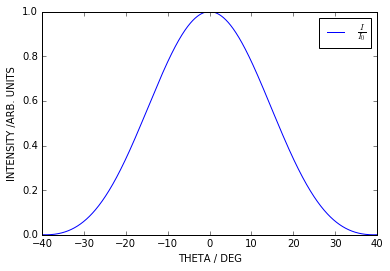

In [146]:
theta = linspace(-40, 40, 1000)
d = 1e-6
Lambda = 632.8e-9
I_0 = 1
plot(theta, I(I_0, d, deg2rad(theta), Lambda), label='$\\frac{I}{I_0}$')
ylabel('INTENSITY /ARB. UNITS')
xlabel('THETA / DEG')
legend();

<br><br><br><br><br><br>
## Problem 2

In [147]:
def I(I_0, d, theta, Lambda, a):
    beta = lambda x: pi*x/Lambda * sin(theta)
    return I_0 * (sin(beta(d))/beta(d))**2 * cos(beta(a))**2

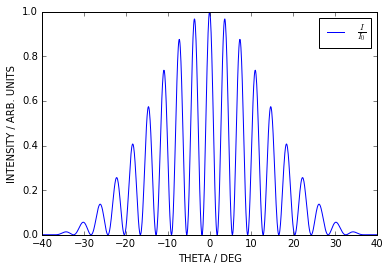

In [148]:
theta = linspace(-40, 40, 1000)
d = 1e-6
a = 10e-6
Lambda = 632.8e-9
I_0 = 1
plot(theta, I(I_0, d, deg2rad(theta), Lambda, a), label='$\\frac{I}{I_0}$')
ylabel('INTENSITY / ARB. UNITS')
xlabel('THETA / DEG')
legend();

<br><br><br><br><Br><Br><br><br>
## Problem 3

In [ ]:
mymean = lambda x: sum(x)/len(x)
mystd  = lambda x: sqrt(1/(len(x)-1) * sum((x-mymean(x))**2))

In [150]:
x=np.arange(5,15)
print('Means are equal:',
      np.mean(x) == mymean(x)
)
print('Std. Devs. are equal:',
      np.std(x, ddof=1) == mystd(x)
)

Means are equal: True
Std. Devs. are equal: True


## Problem 4

In [151]:
sem = lambda x: mystd(x)/sqrt(len(x))

In [152]:
x=[20.28, 21.26, 20.96, 20.70, 20.31, 21.16, 20.60, 20.36, 20.55, 19.95]
print(
    'The mean of x is: {:.2f}\n'
    'The standard deviation is: {:.2f}\n'
    'The standard error on the mean is: {:.2f}'
    .format(
        mymean(x),
        mystd(x),
        sem(x)
    )
)

The mean of x is: 20.61
The standard deviation is: 0.42
The standard error on the mean is: 0.13


<br><br><br>
## Problem 5

In [153]:
D = lambda x: len(x)*sum(x**2) - sum(x)**2 

a1 = lambda x,y: (sum(x**2)*sum(y)-sum(x)*sum(x*y))/D(x)

a2 = lambda x,y: (len(x)*sum(x*y)-sum(x)*sum(y))/D(x)

h = lambda x, y: y - (a1(x,y)+a2(x,y)*x)

sigma_y = lambda x, y: sqrt(sum(h(x,y)**2)/(len(x)-2))

a1_d = lambda x,y: sigma_y(x,y) * sqrt(sum(x**2)/D(x))

a2_d = lambda x,y: sigma_y(x,y) * sqrt(len(x)/D(x))

model = lambda a1, a2, x: a1+a2*x

def mylinreg(x,y):
    plot(x,y, 'k.', label='Data')
    plot(x, model(a1(x,y), a2(x,y), x), 'r', label='Linear Fit')
    title('Linear Fit to Data')
    xlabel('$X$')
    ylabel('$Y$')
    text(
        2,
        26,
            '$a_1 \pm \Delta a_1 = {:.2f} \pm {:.2f}$ \n'
            '$a_2 \pm \Delta a_2 = {:.2f} \pm {:.2f}$'
            .format(a1(x,y), a1_d(x,y), a2(x,y), a2_d(x,y)),
        fontsize=10
    )
    legend(loc='lower right')

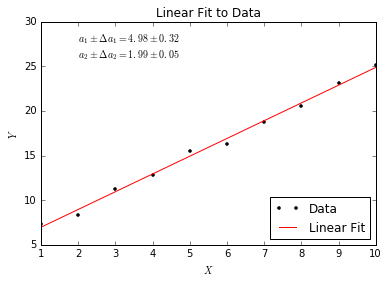

In [154]:

x=array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y=array([
     7.371,  8.292,
    11.296, 12.805,
    15.550, 16.340,
    18.789, 20.493,
    23.127, 25.104
])
mylinreg(x,y)

## Question 6

| Positive $k_2$ | Negative $k_2$|
|---------------|-------------- |
|When $k_2$ is positive, the restoring force is decreases quadratically relative to the linear case as $x$ moves away from equilibrium. This results in a non-sinuisoidal oscillation with an increased maximum velocity, and decreased amplitude. The period is increased significantly.|When $k_2$ is negative, the restoring force is increases quadratically relative to the linear case as $x$ moves away from equilibrium. This results in a non-sinusoidal oscillation with an decreased maximum velocity, and an increased amplitude. The period is increased, but less than with a positive $k_2$|
|![](force-pos.png)   | ![](force-neg.png) |
|![](masspring-linearandnonlinear-pos.png)|![](masspring-linearandnonlinear-neg.png)|